In [2]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
from math import sqrt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
df = pd.read_csv('Concussion Injuries 2012-2014.csv', encoding='utf8')
df.head()

,ID,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,Aldrick Robinson - Washington Redskins vs. Tam...,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,No,Yes,4,2012/2013,1,1.0,No,Head,0,14 downs,37.00 downs
1,D.J. Fluker - Tennessee Titans vs. San Diego C...,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,No,No,3,2013/2014,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,Marquise Goodwin - Houston Texans vs. Buffalo ...,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,No,No,4,2014/2015,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,Bryan Stork - New England Patriots vs. Buffalo...,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,No,Yes,6,2014/2015,1,1.0,No,Head,0,82 downs,41.50 downs
4,Lorenzo Booker - Chicago Bears vs. Indianapoli...,Lorenzo Booker,Chicago Bears,Chicago Bears vs. Indianapolis Colts (9/9/2012),9/09/2012,Indianapolis Colts,Running Back,Yes,Yes,1,2012/2013,0,NaN,No,Head,0,Did not return from injury,NaN


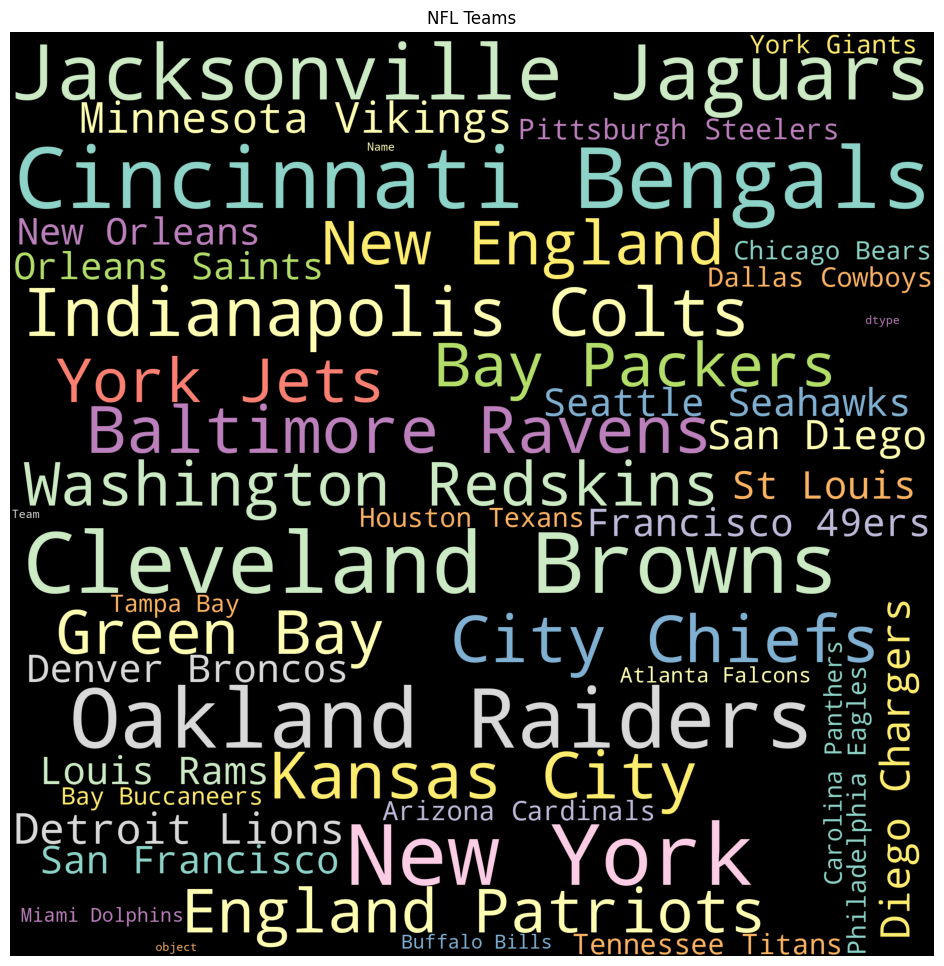

In [5]:
##Code by Taha07  https://www.kaggle.com/taha07/data-scientists-jobs-analysis-visualization/notebook

from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'black',
                      height =2000,
                      width = 2000,
                      colormap='Set3',
                     ).generate(str(df["Team"]))
plt.rcParams['figure.figsize'] = (12,12)
plt.axis("off")
plt.imshow(wordcloud)
plt.title("NFL Teams")
plt.show()

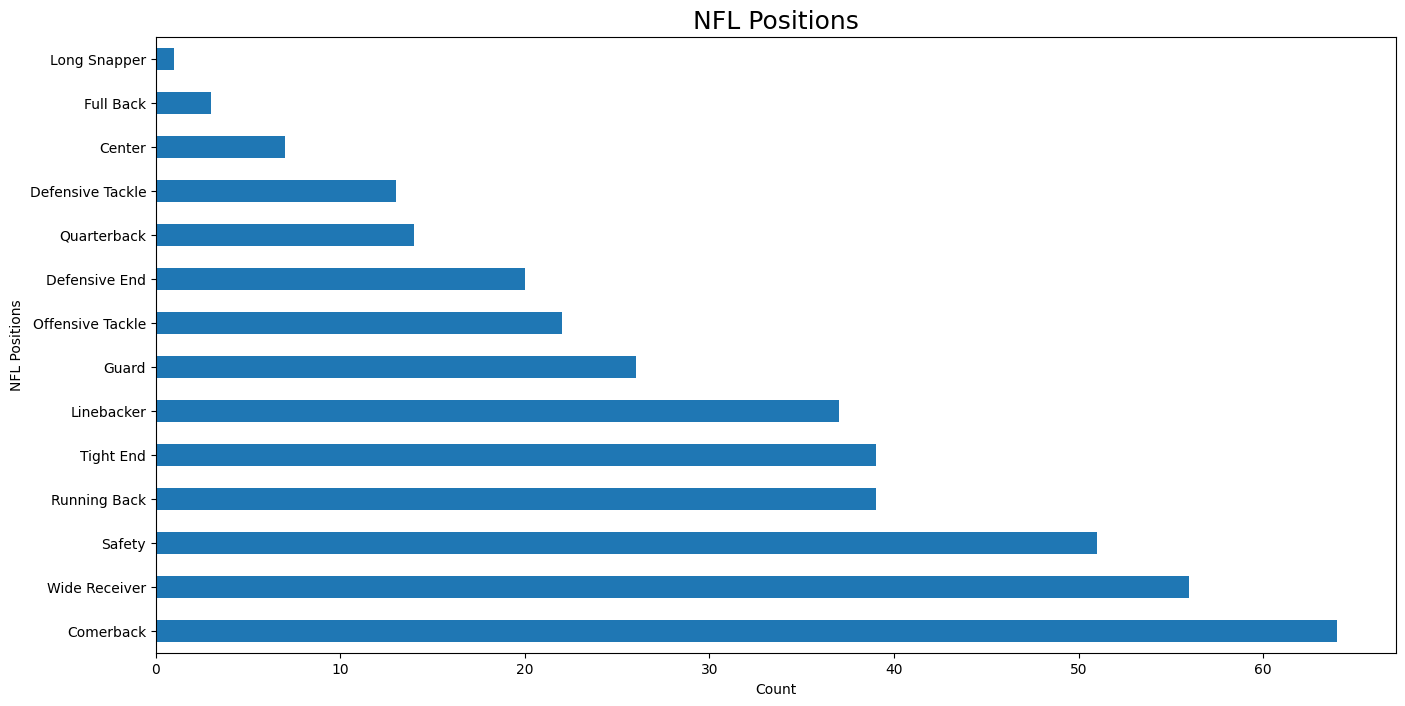

In [7]:
ax = df['Position'].value_counts().plot.barh(figsize=(16, 8))
ax.set_title('NFL Positions', size=18)
ax.set_ylabel('NFL Positions', size=10)
ax.set_xlabel('Count', size=10);

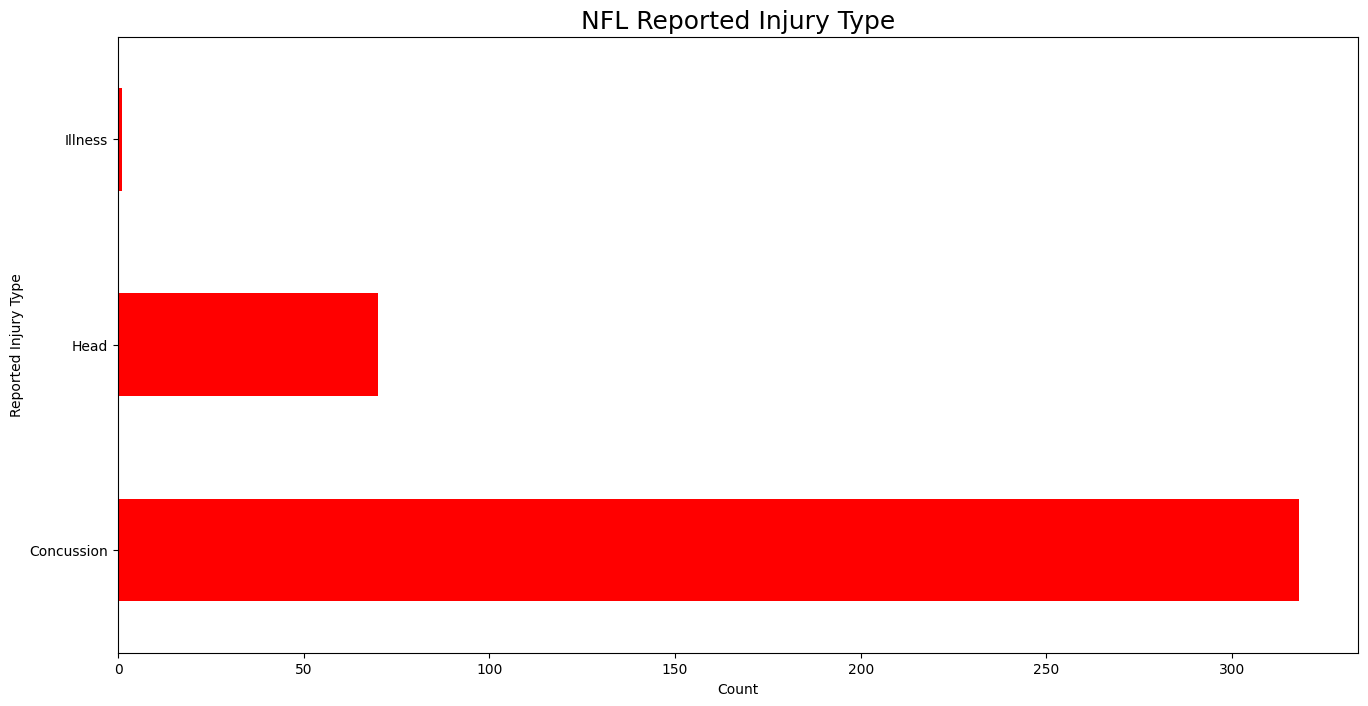

In [8]:
ax = df['Reported Injury Type'].value_counts().plot.barh(figsize=(16, 8), color='r')
ax.set_title('NFL Reported Injury Type', size=18)
ax.set_ylabel('Reported Injury Type', size=10)
ax.set_xlabel('Count', size=10);

In [ ]:
#Code by Lucas Abrahão https://www.kaggle.com/lucasabrahao/trabalho-manufatura-an-lise-de-dados-no-brasil

plt.figure(figsize=(6,4))
df["Unknown Injury?"].value_counts().plot.bar(color=['blue', '#f5005a'], title='NFL Unknown Injury?');

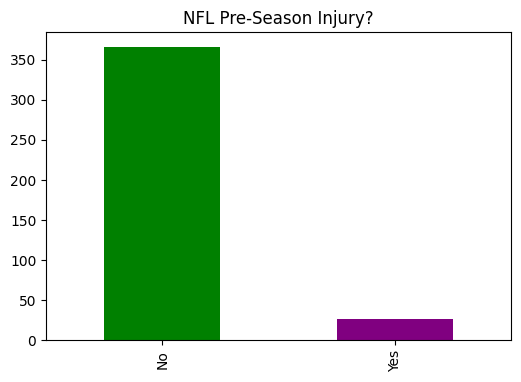

In [10]:
#Code by Lucas Abrahão https://www.kaggle.com/lucasabrahao/trabalho-manufatura-an-lise-de-dados-no-brasil

plt.figure(figsize=(6,4))
df["Pre-Season Injury?"].value_counts().plot.bar(color=['green', 'purple'], title='NFL Pre-Season Injury?');

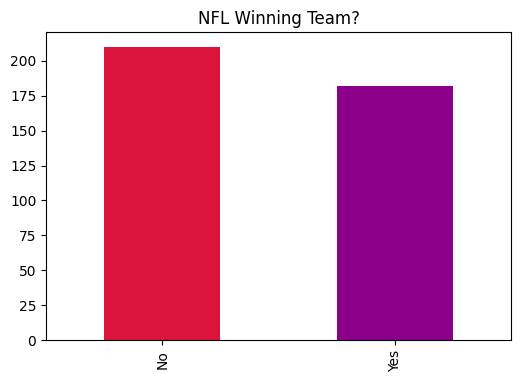

In [11]:
#Code by Lucas Abrahão https://www.kaggle.com/lucasabrahao/trabalho-manufatura-an-lise-de-dados-no-brasil

plt.figure(figsize=(6,4))

df["Winning Team?"].value_counts().plot.bar(color=['#DC143C', '#8B008B'], title='NFL Winning Team?');

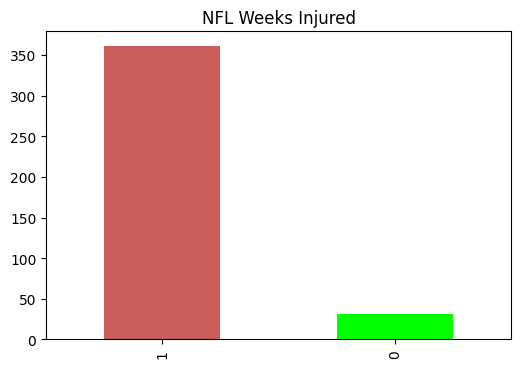

In [12]:
#Code by Lucas Abrahão https://www.kaggle.com/lucasabrahao/trabalho-manufatura-an-lise-de-dados-no-brasil

plt.figure(figsize=(6,4))

df["Weeks Injured"].value_counts().plot.bar(color=['IndianRed', '#00FF00'], title='NFL Weeks Injured');

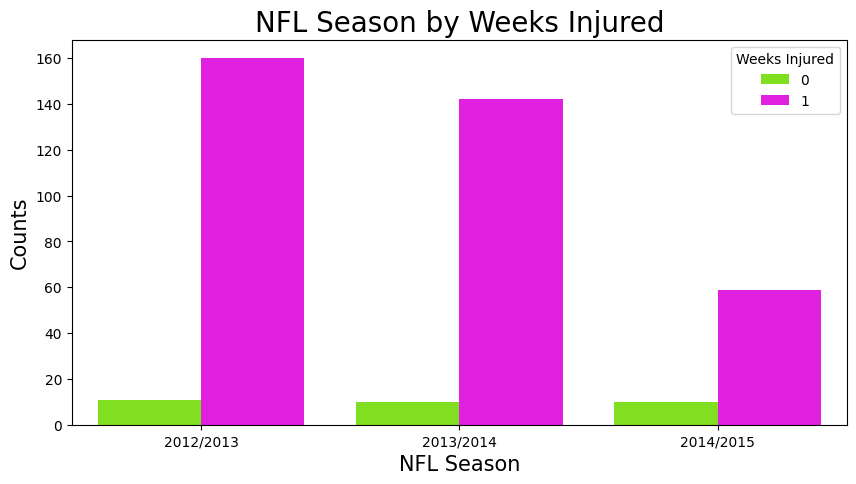

In [13]:
#Code by Baekhakjeon https://www.kaggle.com/baekhakjeon/explorer-tabular-playground-series-apr-2021

plt.figure(figsize = (10, 5), dpi = 100)
ax = sns.countplot(x='Season', hue='Weeks Injured', palette= ["Chartreuse", "magenta"], data=df)

# Display values on the plot
for p in ax.patches:
    ax.annotate(text=p.get_height(), xy=(p.get_x()+0.2, p.get_height()+1000), horizontalalignment='center', verticalalignment='top', color='black', size=10)

plt.title("NFL Season by Weeks Injured", fontsize=20)
plt.xlabel('NFL Season', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

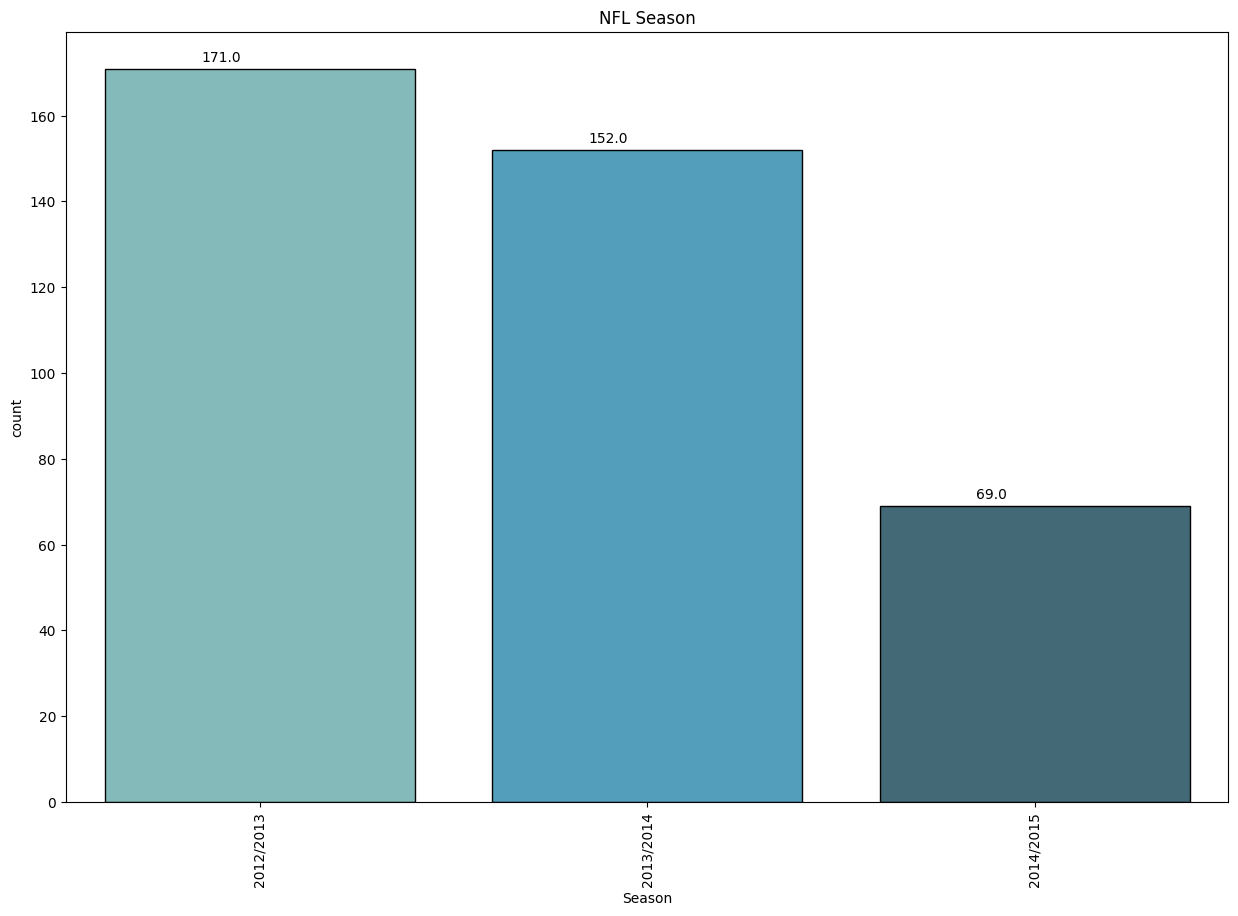

In [14]:
plt.figure(figsize=(15, 10))
ax=sns.countplot(x="Season", data=df,palette="GnBu_d",edgecolor="black", order = df['Season'].value_counts().index)
plt.xticks(rotation=90)
plt.title('NFL Season')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')
plt.show()

In [20]:
#Codes by Rohit Singh https://www.kaggle.com/rohitsingh9990/trends-eda-visualization-simple-baseline


def plot_bar(df, feature, title='NFL Games Missed', show_percent = False, size=2):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    total = float(len(df))
    sns.barplot(np.round(df[feature].value_counts().index).astype(int), df[feature].value_counts().values, alpha=0.8, palette='Set2')

    plt.title(title)
    if show_percent:
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%'.format(100*height/total),
                    ha="center", rotation=45)
    plt.xlabel(feature, fontsize=12, )
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xticks(rotation=90)
    plt.show()


In [23]:
#Code by Parul Pandey  https://www.kaggle.com/parulpandey/a-guide-to-handling-missing-values-in-python


from sklearn.impute import SimpleImputer
df_most_frequent = df.copy()
#setting strategy to 'mean' to impute by the mean
mean_imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median
df_most_frequent.iloc[:,:] = mean_imputer.fit_transform(df_most_frequent)

In [24]:
from sklearn.preprocessing import LabelEncoder

#fill in mean for floats
for c in df_most_frequent.columns:
    if df_most_frequent[c].dtype=='float16' or  df_most_frequent[c].dtype=='float32' or  df_most_frequent[c].dtype=='float64':
        df_most_frequent[c].fillna(df[c].mean())

#fill in -999 for categoricals
df_most_frequent = df_most_frequent.fillna(-999)
# Label Encoding
for f in df_most_frequent.columns:
    if df_most_frequent[f].dtype=='object':
        lbl = LabelEncoder()
        lbl.fit(list(df_most_frequent[f].values))
        df_most_frequent[f] = lbl.transform(list(df_most_frequent[f].values))

print('Labelling done.')

Labelling done.


In [25]:
df_most_frequent.isnull().sum()


ID                                0
Player                            0
Team                              0
Game                              0
Date                              0
Opposing Team                     0
Position                          0
Pre-Season Injury?                0
Winning Team?                     0
Week of Injury                    0
Season                            0
Weeks Injured                     0
Games Missed                      0
Unknown Injury?                   0
Reported Injury Type              0
Total Snaps                       0
Play Time After Injury            0
Average Playtime Before Injury    0
dtype: int64

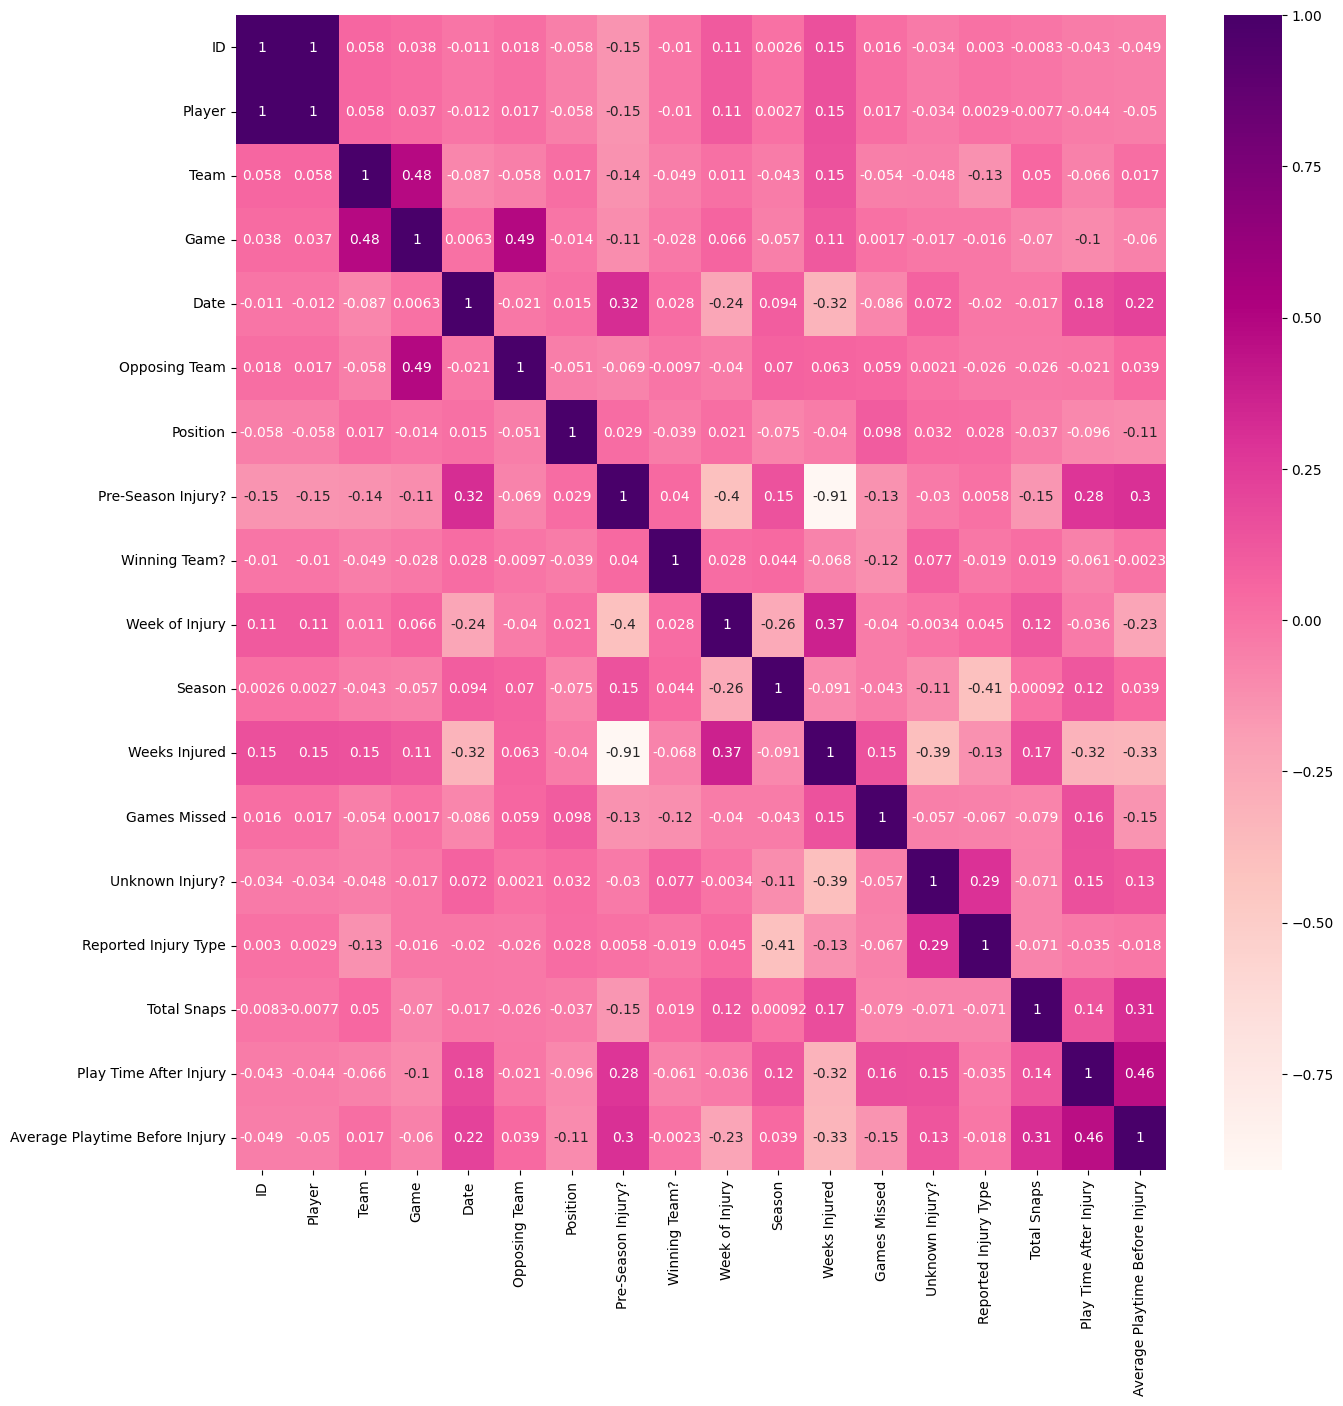

In [26]:
import seaborn as sbn

correlation=df_most_frequent.corr()
plt.figure(figsize=(15,15))
sbn.heatmap(correlation,annot=True,cmap=plt.cm.RdPu);

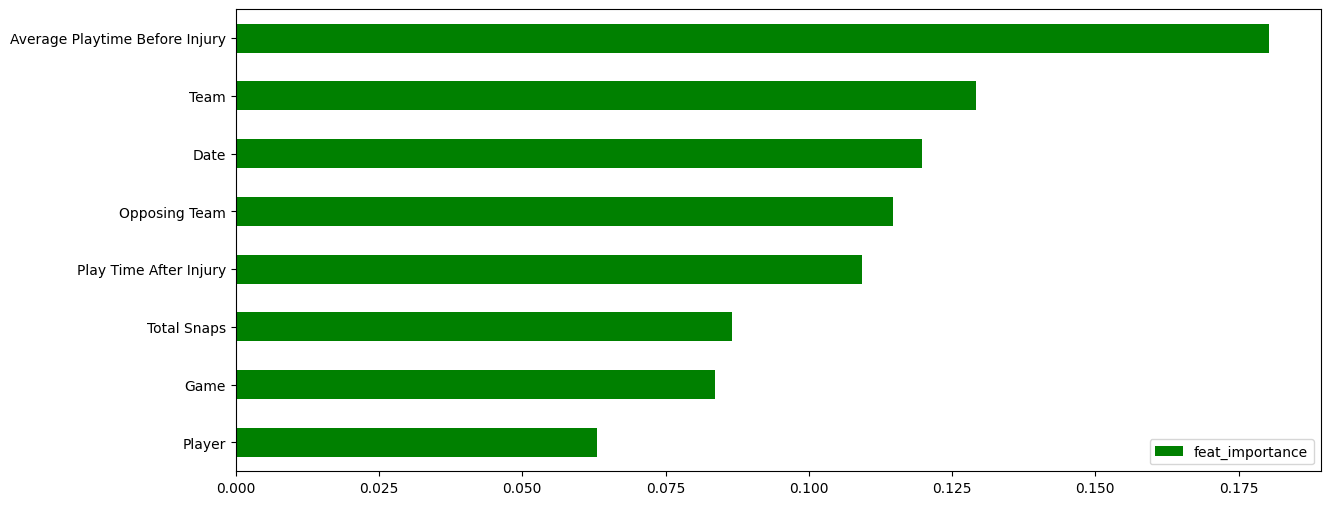

In [28]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
x = df_most_frequent.drop(['ID', 'Position'], axis=1)
x.fillna(999999, inplace=True)
y = df_most_frequent['Position']
#Muhammad Saad advice change max_depth to 7 instead of 3 to avoid Decision Tree shrinking in the viewer.

dt = DecisionTreeClassifier(max_depth=7)
dt.fit(x, y)

dt_feat = pd.DataFrame(dt.feature_importances_, index=x.columns, columns=['feat_importance'])
dt_feat.sort_values('feat_importance').tail(8).plot.barh(figsize=(14, 6), color='green')
plt.show()

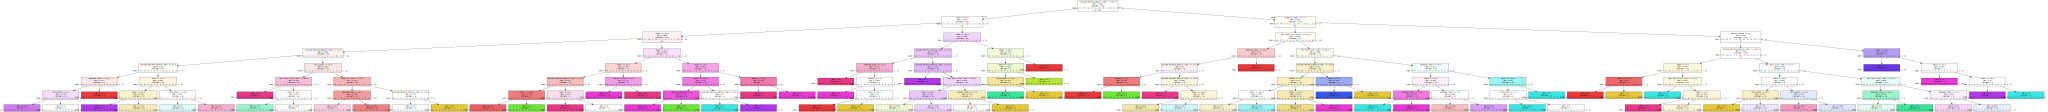

In [29]:

from IPython.display import SVG
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

graph = Source(export_graphviz(dt, out_file=None, feature_names=x.columns, filled = True))
display(SVG(graph.pipe(format='svg')))

In [30]:
x = df_most_frequent.drop(['Total Snaps', 'Average Playtime Before Injury'], axis=1)
x.fillna(999999, inplace=True)
y = df_most_frequent['Average Playtime Before Injury']
dt = DecisionTreeClassifier(max_depth=7)

In [32]:
x = df_most_frequent.drop(['Total Snaps', 'Average Playtime Before Injury'], axis=1)
x.fillna(999999, inplace=True)
y = df_most_frequent['Average Playtime Before Injury']
dt = DecisionTreeClassifier(max_depth=7)
dt.fit(x, y)

DecisionTreeClassifier(max_depth=7)

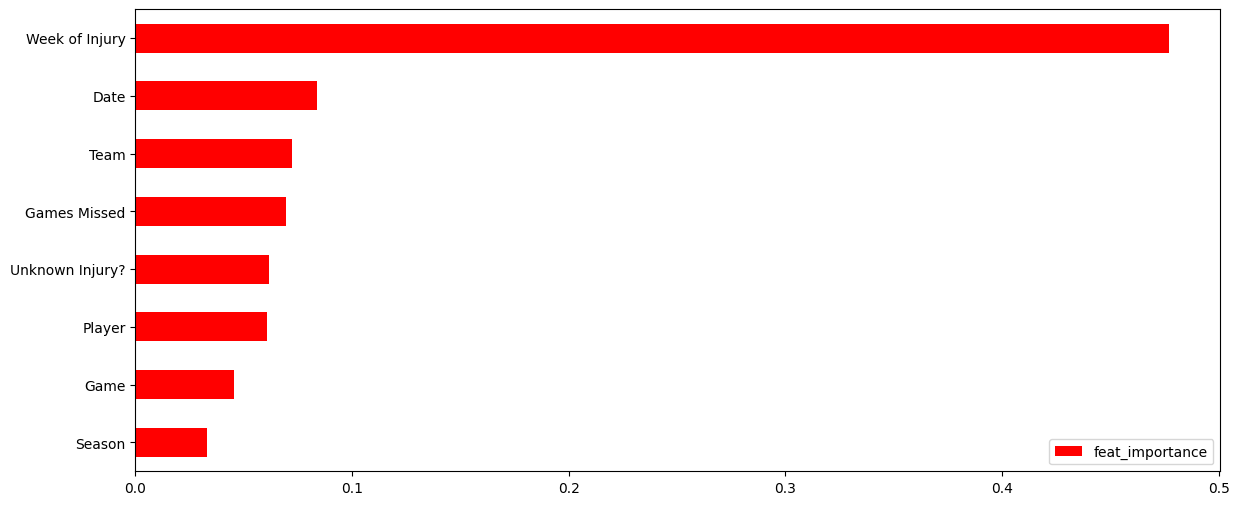

In [33]:
dt_feat = pd.DataFrame(dt.feature_importances_, index=x.columns, columns=['feat_importance'])
dt_feat.sort_values('feat_importance').tail(8).plot.barh(figsize=(14, 6), color='red')
plt.show()

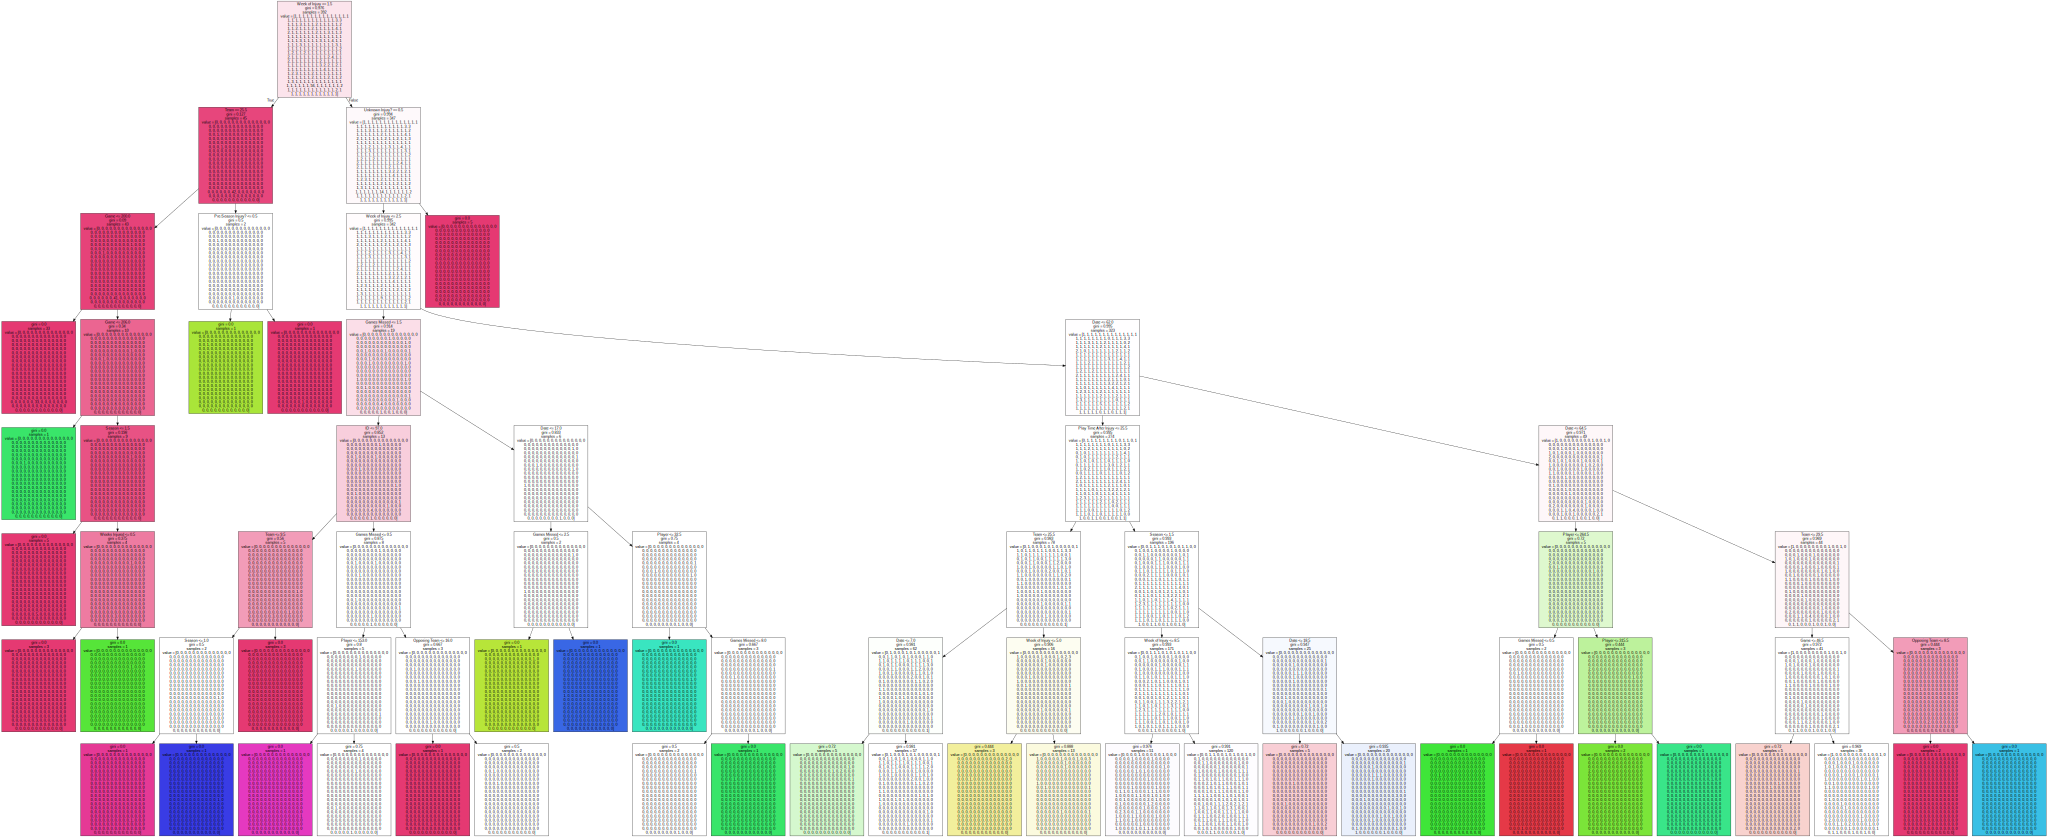

In [34]:

from IPython.display import SVG
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

graph = Source(export_graphviz(dt, out_file=None, feature_names=x.columns, filled = True))
display(SVG(graph.pipe(format='svg')))